# 地震学原理与基础应用

## 从观测开始——地震图
在某时某地发生了地震——该地，质点随时间发生运动——被观测记录。

观测信息表明，远处的地震源头发出信号，经过传播，被观察者记录：

$$
u(t) = S(t)*G(t)*I(t)
$$

其中$u(t)$表示该点的位移，也就是台站记录的“震动”信号，即地震图（seismogram）；$S(t)$表示震源的信号，$G(t)$表示了信号经过介质发生的变化/对所经过的介质的响应，即所谓“场对源的响应”——格林函数；$I(t)$表示仪器对这些信号的反映。

可见，地震记录由震源、传播介质、接收仪器三部分（“起因、经过、结果”）的叠加作用所生成。一般仪器响应$I(t)$已知，因此主要研究的就是**震源**与**结构**的信息。

地震元数据（metadata）则记录了地震台站的地理位置和仪器的响应等信息。因此元数据和地震图结合可构成完备的地震观测记录；震相、波形等信息均记录在内。

利用完备的地震观测，结合地层信息（或地层假设）和波动方程等数理预设，就可以开展一系列的地震学研究工作，进行波形反演、地层结构恢复等探索。
![<img src="./jupyter_logo.png", width=320, heigth=240>](https://file.notion.so/f/f/d4e2b7a8-863f-4772-b1b0-dd9ce6a5defb/a3efe0f5-4487-4747-9bae-efb593b23e85/image.png?table=block&id=13efe443-1c3e-80c8-a4e4-c5008ffe0c72&spaceId=d4e2b7a8-863f-4772-b1b0-dd9ce6a5defb&expirationTimestamp=1732017600000&signature=i-5YCTYFlAikUbQBW6fD0_Fq_YlBeSFWlTWHEmH9x30&downloadName=image.png)

## 数据记录与下载
上面提到，地震的观测就是台站所记录到的信号。由于信号以一定的规律进行时空上的传播，因此具有一定强度的地震事件往往能够被多个台站所接收。

从宽泛到细节，数据一般分为**地震目录**（某时某地，某强度的震源信息）、**台站数据**（某一个台站的信号记录）和**波形数据**（可以是不同空间分量，如北东下三分量中的其中一个）。

常用软件介绍详见[常用软件 — 地震“学”科研入门教程](https://seismo-learn.org/seismology101/exercises/software/)。由于Python的易用性和简洁性，下面默认使用obspy库进行数据的处理和分析。

### 地震目录
从USGS下载：[Search Earthquake Catalog](https://earthquake.usgs.gov/earthquakes/search/)

从EARS下载：[EARS - Home](http://ears.iris.washington.edu/index.html)

用obspy：

25 Event(s) in Catalog:
2024-09-13T23:03:41.334000Z | +29.811, +130.921 | 5.7  mww | manual
2024-09-12T23:48:17.804000Z | +30.979, +141.315 | 5.2  mww | manual
...
2024-01-27T23:59:29.184000Z | +35.533, +139.956 | 5.1  mb | manual
2024-01-26T12:46:16.087000Z | +29.124, +141.556 | 5.4  mww | manual
To see all events call 'print(CatalogObject.__str__(print_all=True))'


/home/codespace/.python/current/lib/python3.12/site-packages/obspy/io/quakeml/core.py:1112: UserWarning: 'quakeml:earthquake.usgs.gov/fdsnws/event/1/query?starttime=2024-01-01T00%3A00%3A00.000000&endtime=2024-10-01T00%3A00%3A00.000000&minlatitude=29.0&maxlatitude=50.0&minlongitude=125.0&maxlongitude=145.0&mindepth=30.0&minmagnitude=5.0' is not a valid QuakeML URI. It will be in the final file but note that the file will not be a valid QuakeML file.
  warnings.warn(msg % obj.id)


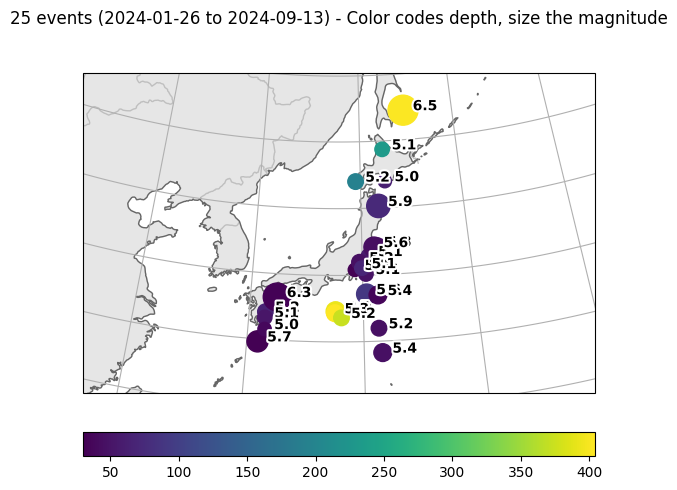

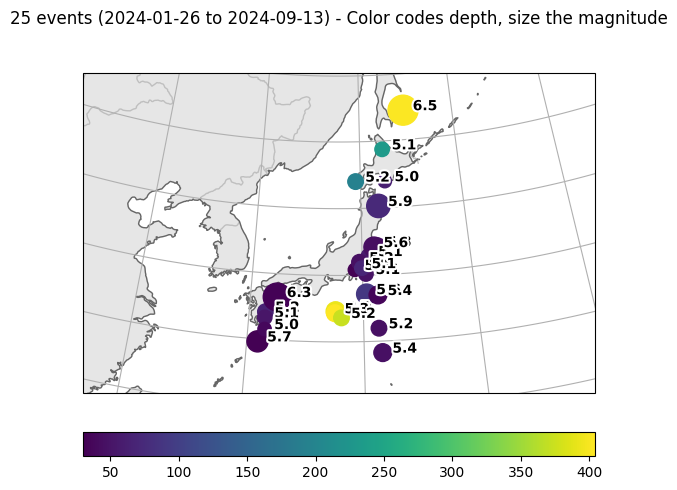

In [4]:
# 导入obspy用于获取地震目录的包
from obspy.clients.fdsn import Client

# 初始化句柄对象
client = Client("USGS")

# 获取地震事件目录（catalog类，可视作以地震事件event为元素的列表
catalog = client.get_events(
    starttime="2024-01-01", # 开始时间
    endtime="2024-10-01",   # 截止时间
    minmagnitude=5.0,   # 最小震级
    mindepth=30,            # 最小震源深度
    minlatitude=29,         # 纬度范围起点
    maxlatitude=50,         # 纬度范围终点
    minlongitude=125,   # 经度范围起点
    maxlongitude=145    # 经度范围终点
)

# 展示获取的目录信息
print(catalog)

# 保存获取的台站信息，以QuakeML形式保存
catalog.write("japan-earthquakes.xml", format="QUAKEML")

# 读取台站信息
from obspy import read_events
catalog_read = read_events("japan-earthquakes.xml")

# 地震目录类自带的绘图功能（类似GMT的参数
catalog_read.plot(projection="local", resolution="i")

### 地震波形

[地震波形数据 — 地震“学”科研入门教程](https://seismo-learn.org/seismology101/exercises/waveform/)

## 地震数据处理